In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import svm
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from keras import models, layers

Using TensorFlow backend.


In [2]:
data = pd.read_csv('outputs/Net_0.25_aws-sdk-mock.csv',header=0)

In [3]:
from sklearn.model_selection import train_test_split

columns=["PR","Pred_eval","Real_eval", "Leader",'In-degree','Net_ind','Net_recip','Net_trans','Comments','Merged?','Created_at','Updated_at','Closed_at']

X_columns_train = ['In-degree','Net_ind','Net_recip','Net_trans']
Y_columns_train = ['Merged?']

X=data[X_columns_train]
Y=data[Y_columns_train]
print(X.shape)

(178, 4)


In [4]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
import statistics
## Train SVM
svr_rbf = SVR(kernel='rbf', C=1e2, gamma=0.01)
svr_lin = SVR(kernel='linear', C=1e2)
svr_poly = SVR(kernel='poly', C=1e2, degree=2)

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:

MSE_errors_svr_rbf = [0] * 10
MAE_errors_svr_rbf = [0] * 10
R2_errors_svr_rbf = [0] * 10

MSE_errors_svr_lin = [0] * 10
MAE_errors_svr_lin = [0] * 10
R2_errors_svr_lin = [0] * 10

MSE_errors_svr_poly = [0] * 10
MAE_errors_svr_poly = [0] * 10
R2_errors_svr_poly = [0] * 10

Y_predicted_rbf = [0] * 10
Y_predicted_lin = [0] * 10
Y_predicted_poly = [0] * 10


for index in range(0,10):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=0.10)
    
    Y_svr_test = Y_test
    X_svr_test = X_test

    y_rbf = svr_rbf.fit(X_train, Y_train).predict(X_test)
    y_lin = svr_lin.fit(X_train, Y_train).predict(X_test)
    y_poly = svr_poly.fit(X_train, Y_train).predict(X_test)


    MSE_errors_svr_rbf[index] = np.mean(mean_squared_error(Y_test, y_rbf))
    R2_errors_svr_rbf[index] = np.mean(r2_score(Y_test, y_rbf))
    MAE_errors_svr_rbf[index] = np.mean(mean_absolute_error(Y_test, y_rbf))

    MSE_errors_svr_lin[index] = np.mean(mean_squared_error(Y_test, y_lin))
    R2_errors_svr_lin[index]= np.mean(r2_score(Y_test, y_lin))
    MAE_errors_svr_lin[index] = np.mean(mean_absolute_error(Y_test, y_lin))

    MSE_errors_svr_poly[index] = np.mean(mean_squared_error(Y_test, y_poly))
    R2_errors_svr_poly[index] = np.mean(r2_score(Y_test, y_poly))
    MAE_errors_svr_poly[index] = np.mean(mean_absolute_error(Y_test, y_poly))

    Y_predicted_rbf[index] = y_rbf
    Y_predicted_lin[index]= y_lin
    Y_predicted_poly[index] = y_poly


print("y_rbf: MSE 10-fold: %.2f"% statistics.mean(MSE_errors_svr_rbf))
# Explained variance score: 1 is perfect prediction
print ("y_rbf: MAE 10-fold %.2f"
      % statistics.mean(MAE_errors_svr_rbf))
print('y_rbf: R2 10-fold %.2f' % statistics.mean(R2_errors_svr_rbf))

print("y_lin: MSE 10-fold: %.2f"
      % statistics.mean(MSE_errors_svr_lin))
print ("y_lin: MAE 10-fold Error %.2f"
      % statistics.mean(MAE_errors_svr_lin))
print('y_lin: R2 10-fold %.2f' % statistics.mean(R2_errors_svr_lin))

print("y_poly: MSE 10-fold: %.2f"
      % statistics.mean(MSE_errors_svr_poly))
print ("y_poly: MAE 10-fold %.2f"
      % statistics.mean(MAE_errors_svr_poly))
# Explained variance score: 1 is perfect prediction
print('y_poly: R2 10-fold %.2f' % statistics.mean(R2_errors_svr_poly))



y_rbf: MSE 10-fold: 0.21
y_rbf: MAE 10-fold 0.31
y_rbf: R2 10-fold 0.03
y_lin: MSE 10-fold: 0.22
y_lin: MAE 10-fold Error 0.32
y_lin: R2 10-fold -0.01
y_poly: MSE 10-fold: 0.22
y_poly: MAE 10-fold 0.32
y_poly: R2 10-fold -0.01


In [7]:
MSE_errors_reg = [0] * 10
R2_errors_reg = [0] * 10
MAE_errors_reg = [0] * 10

for index in range(0,10):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=0.10)
    reg = LinearRegression().fit(X_train, Y_train)
    prediction_reg = reg.predict(X_test)

    MSE_errors_reg[index] = np.mean(mean_squared_error(Y_test, prediction_reg))
    R2_errors_reg[index] = np.mean(r2_score(Y_test, prediction_reg))
    MAE_errors_reg[index] = np.mean(mean_absolute_error(Y_test, prediction_reg))


    
print("lin Reg: MSE 10-fold: %.2f"
  %statistics.mean(MSE_errors_reg))
print ("lin Reg: MAE 10-fold %.2f"
      %statistics.mean(MAE_errors_reg))
print ("lin Reg: R2 %.2f"% statistics.mean(R2_errors_reg))



lin Reg: MSE 10-fold: 0.18
lin Reg: MAE 10-fold 0.35
lin Reg: R2 0.07


In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
activation = 'relu'
#activation = 'tanh'
#activation = 'softmax'

MSE_errors_nn = [0] * 1
MAE_errors_nn = [0] * 1
R2_errors_nn = [0] * 1

network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation=activation, input_shape=(X.shape[1],)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation=activation))
# Add fully connected layer with no activation function
network.add(layers.Dense(units=1,activation='sigmoid'))
network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y,   test_size=0.10)
X_train, X_tmp, Y_train, Y_tmp = train_test_split(X, Y, test_size=1 - train_ratio)
X_val, X_test, Y_val, Y_test = train_test_split(X_tmp, Y_tmp, test_size=test_ratio/(test_ratio + validation_ratio))

    
result = network.fit(X_train, # Features
                  Y_train, # Target vector
                  epochs=100, # Number of epochs
                  verbose=1, # with output
                  batch_size=10, 
                  validation_data=(X_val, Y_val)) # Data for evaluation
prediction_nn = network.predict(X_test)

MSE_errors_nn = np.mean(mean_squared_error(Y_test, prediction_nn))
R2_errors_nn = np.mean(r2_score(Y_test, prediction_nn))
MAE_errors_nn = np.mean(mean_absolute_error(Y_test, prediction_nn))

    

print("NN: MSE 10-fold: %.4f"
  % MSE_errors_nn)
print ("NN: MAE 10-fold %.4f"
      % MAE_errors_nn)
print('NN: R2 10-fold %.4f' % R2_errors_nn)
print ("\n\n")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 133 samples, validate on 27 samples
Epoch 1/100
133/133 [==============================] - 0s 3ms/step - loss: 0.7318 - acc: 0.6391 - val_loss: 0.8414 - val_acc: 0.5556
Epoch 2/100
133/133 [==============================] - 0s 572us/step - loss: 0.7072 - acc: 0.6767 - val_loss: 0.7743 - val_acc: 0.5556
Epoch 3/100
133/133 [==============================] - 0s 399us/step - loss: 0.6866 - acc: 0.6767 - val_loss: 0.7381 - val_acc: 0.5556
Epoch 4/100
133/133 [==============================] - 0s 327us/step - loss: 0.6728 - acc: 0.6767 - val_loss: 0.7085 - val_acc: 0.5556
Epoch 5/100
133/133 [==============================] - 0s 440us/step - loss: 0.6608 - acc: 0.6767 - val_loss: 0.7025 - val_acc: 0.5556
Epoch 6/100
133/133 [==============================] - 0s 604us/step - loss: 0.6466 - acc: 0.6917 - val_loss: 0.6680 - val_acc: 0.5185
Epoch 7/100
133/133 [======

Epoch 57/100
133/133 [==============================] - 0s 193us/step - loss: 0.4956 - acc: 0.7444 - val_loss: 0.5627 - val_acc: 0.5926
Epoch 58/100
133/133 [==============================] - 0s 178us/step - loss: 0.4953 - acc: 0.7669 - val_loss: 0.5678 - val_acc: 0.5926
Epoch 59/100
133/133 [==============================] - 0s 223us/step - loss: 0.4940 - acc: 0.7519 - val_loss: 0.5635 - val_acc: 0.5926
Epoch 60/100
133/133 [==============================] - 0s 212us/step - loss: 0.4945 - acc: 0.7594 - val_loss: 0.5620 - val_acc: 0.5926
Epoch 61/100
133/133 [==============================] - 0s 216us/step - loss: 0.4925 - acc: 0.7293 - val_loss: 0.5569 - val_acc: 0.6667
Epoch 62/100
133/133 [==============================] - 0s 192us/step - loss: 0.4923 - acc: 0.7368 - val_loss: 0.5599 - val_acc: 0.6296
Epoch 63/100
133/133 [==============================] - 0s 199us/step - loss: 0.4922 - acc: 0.7368 - val_loss: 0.5593 - val_acc: 0.6296
Epoch 64/100
133/133 [==========================

(18,) (18,)
[0.23740812 0.09212792 0.09994714 1.03020104 0.18736497 0.21072495
 0.06973348 0.09636216 0.28421847 0.09636216 0.09994714 0.06996565
 0.09994714 0.09213988 0.76875672 0.61062451 0.09159502 0.08972682]


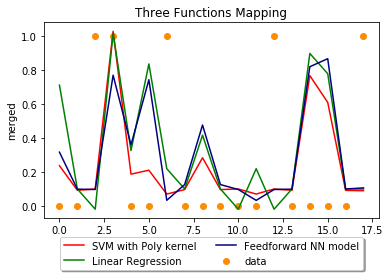

In [25]:
Y_columns = ['Merged?']
index = 0
Y_here = Y_svr_test['Merged?']
X_here = X_svr_test["In-degree"]
print(X_here.shape, Y_here.shape)
print( Y_predicted_poly[1])

# Look at the results
lw = 1.5

X_here = range(0,X_here.shape[0])
plt.scatter(X_here, Y_here, color='darkorange', label='data')
plt.plot(X_here, Y_predicted_poly[1], color='Red', lw=lw, label='SVM with Poly kernel')
plt.plot(X_here, Y_predicted_lin[1], color='green', lw=lw, label='Linear Regression')
plt.plot(X_here,Y_predicted_rbf[1], color='navy', lw=lw, label='Feedforward NN model')

plt.xlabel('Data Point')
plt.ylabel('merged')
ax = plt.subplot(111)
plt.title('Three Functions Mapping')
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07),
          fancybox=True, shadow=True, ncol=2)


filename = "svr.png"
plt.savefig(filename, dpi=700)
plt.show()
